<h1 align="center" style="color: #A9A9A9;"> Welcome to the Quantum Chemistry </h1>

# <a id='toc1_'></a>[ ](#toc0_)
---

|$\LARGE \textbf{\textcolor{red}{Openbabel xTB-crest and Pyscf Quantum Chemistry Calculations Assessment and Validation:}}$
|                                                                                                                          
---



---
1. ###  **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique


02 SEPTEMBRE 2024

---

<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="images/QCL.jpeg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://github.com/GitNindjapatrick/" target="_blank">
        <img align="right" src="images/github.png" width="40px"></a> </td>
    <td style="padding:0px;width:5px;"></td>
    <td style="padding:0px;width:40px;">
        <a href="https://linkedin.com/in/patrick-sorrel-mvoto-kongo-641a41273" target="_blank">
        <img align="right" src="images/LinkedIn.png"></a></td>
    <td style="padding:0px;width:5px;"></td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://discord.MVOTO.net"
           target="_blank">
        <img align="right" src="images/Discord.png"></a></td>
</tr></table>

[COMPARAISON OPENBABEL et RDKIT](MVOTO_COMPARAISON_OPEN-RDKIT.ipynb) &nbsp;|&nbsp;
[COMPARAISON OPENBABEL VALIDATION](MVOTO_COMPARAISON_OPEN-RDKIT_VALIDATION.ipynb) &nbsp;|&nbsp;
[COMPARAISON RMSD](MVOTO_COMPARAISON_XTBV240803.ipynbynb) &nbsp;|&nbsp;
[SMILES GENERATE](rdkit_acc_don_smiles.ipynb) &nbsp;|&nbsp;
[SKLEARN MAE](ml_xtb.ipynb) &nbsp;|&nbsp;
[hvplot et pygwalke](hvplot_pygwalker.ipynb) &nbsp;|&nbsp;

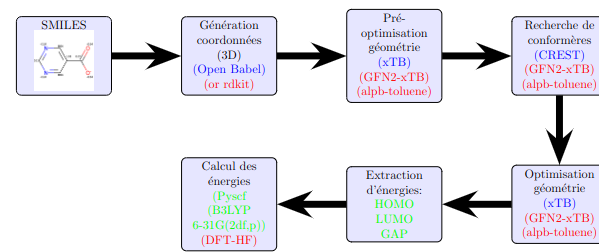

In [1]:

from IPython.display import Image
Image(filename='workflow.png', format='png', width=1500, height=1500)

---
## <a id='toc1_'></a>[**Problèmes rencontrés lors de l'implémentation du flux de travail**](#toc0_)

indiquant qu'il n'a pas été en mesure d'identifier une liaison disponibles

*niveau de recurrences des problemes:
faible (<font size="+1" color="7777ee">&#9733;</font>), 
moyenne (<font size="+1" color="7777ee">&#9733;&#9733;</font>), and
elevee (<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font>).*

<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9733;</font> |
[Échec du processus de optimisation géométrique]() 
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[`RDKit` modifie rapidement la topologie, en contraste avec `OpenBabel`, qui conserve mieux la structure initiale lors des calculs.]()
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[Changement de topologie détecté après la pré-optimisation en entrée, en tant qu'artefact du niveau de théorie choisi `GFN`, entraînant l'arrêt anormal de la recherche de conformères avec CREST]()
<br>
<font size="+1" color="7777ee">&#9734;&#9733;&#9733;</font> |
[Échec d'`OpenBabel` lors de la tentative de définition de la stéréochimie indiquant qu'il n'a pas été en mesure d'identifier une liaison disponibles]()
<br>
<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font> |
[Échec du processus de pré-optimisation géométrique]()

---
# **Workflow pour l'Optimisation des Molécules**

## **1. Image SMILES**
Nous commençons par une représentation SMILES de la molécule. Cette structure en 2D est convertie en coordonnées 3D à l'aide d'outils comme RDKit ou Open Babel.
---
## **2. Génération des Coordonnées 3D**
- **Objectif :** Transformer la représentation SMILES en une structure 3D.
- **Méthodes :** RDKit ou Open Babel génèrent les coordonnées 3D à partir de la représentation SMILES.
- **Défis :** Il peut y avoir des problèmes de conversion stéréochimique (e.g., OpenBabel peut échouer à identifier un lien spécifique).
---
## **3. Pré-optimisation avec xTB**
- **Objectif :** Pré-optimiser la géométrie moléculaire pour minimiser l'énergie.
- **Méthode :** Utiliser xTB avec différents niveaux de théorie (`GFN0`, `GFN1`, `GFN2`).
- **Checkpoint :** Vérifier la convergence de la géométrie après chaque pré-optimisation. Si l'optimisation échoue, changer de niveau de théorie et réessayer.
- **Action si échec :** Si tous les niveaux de théorie échouent, retirer la molécule du dataset.
---
## **4. Recherche de Conformères avec CREST**
- **Objectif :** Explorer différentes conformations énergétiquement viables pour la molécule.
- **Méthode :** Utiliser CREST pour la recherche de conformères après la pré-optimisation.
- **Checkpoint :** Vérifier la topologie après la recherche de conformères. Si un changement de topologie est détecté, réoptimiser en changeant de niveau de théorie.
- **Action si échec :** Si toutes les tentatives échouent, retirer la molécule du dataset.
---
## **Hypothèses de Dépannage**

### **1. Échec de la pré-optimisation de la géométrie**
- Ajouter un **checkpoint** après chaque pré-optimisation.
- Si l'optimisation échoue, essayer un autre niveau de théorie (`GFN2`, `GFN1`, `GFN0`).
- Si tous échouent, retirer la molécule du dataset.
---
### **2. Changement de Topologie après Pré-optimisation**
- Ajouter un **checkpoint** après la recherche de conformères.
- En cas de changement de topologie, réoptimiser la géométrie avec un autre niveau de théorie.
- Si tous échouent, retirer la molécule du dataset.


---
<div class="alert alert-info">
     <strong> 
<br>Ce workflow structuré permet de gérer les problèmes potentiels tout en assurant la robustesse du pipeline d'analyse moléculaire. 
</br>
    <strong> 
</div>



---

### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers `best_GDB9.csv` et creer un DataFrame](#toc0_)



Le dataset initial utilisé dans cette étude est composé de `52 607` molécules (`best_GDB9.csv`) organiques stables constituées des éléments `C,H,O,N,F`. Ces molécules représentent un sous-ensemble du dataset `GDB-9`, qui fait partie d'une base de données plus vaste, le `GDB-17`, comprenant `166 milliards` de molécules organiques possibles.

Le dataset `GDB-9` contient des propriétés géométriques, énergétiques, et électroniques calculées pour environ `134 000` molécules, incluant les énergies des orbitales `HOMO`  et `LUMO`, ainsi que le gap énergétique entre ces deux niveaux. Toutes les propriétés ont été calculées au niveau de théorie `B3LYP/6-31G(2df,p)` en chimie quantique.

Les molécules sont constituées de jusqu'à neuf atomes lourds `(C, O, N, F)`, et les géométries minimales en énergie ont été déterminées. Pour la stœchiométrie prédominante, `C$_7$H$_{10}$O$_2$`, des propriétés supplémentaires comme les énergies, enthalpies et énergies libres d'atomisation ont été rapportées au niveau théorique `G4MP2`, un niveau plus précis de chimie quantique .

In [2]:
import pandas.util  # Assuming 'util' is an alias for pandas.util
import pandas as pd
# Read the CSV file

df = pd.read_csv("best_GDB9.csv")
#df=pd.read_pickle('qm9_samples.pkl')
# Filter rows with pce_1 > 10
#df.rename(columns={'Id':'smiles_key','Gap': 'GAP(eV)','HOMO': 'HOMO(eV)','LUMO': 'LUMO(eV)'}, inplace=True)
#df = df.loc[:, ['smiles_key', 'SMILES', 'HOMO(eV)','LUMO(eV)', 'GAP(eV)']]
df

,smiles_key,SMILES,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV)
0,gdb 6,C=O,-0.2670,-0.0406,0.2263,-7.265440,-1.104782,6.157937
1,gdb 11,CC=O,-0.2540,-0.0198,0.2342,-6.911692,-0.538785,6.372907
2,gdb 18,CC(C)=O,-0.2431,-0.0087,0.2344,-6.615088,-0.236739,6.378349
3,gdb 23,C#CC#C,-0.2599,-0.0214,0.2386,-7.072239,-0.582324,6.492637
4,gdb 24,C#CC#N,-0.3102,-0.0543,0.2559,-8.440972,-1.477578,6.963394
...,...,...,...,...,...,...,...,...
52602,gdb 133850,CC12C3C4CC(N13)C2=C4,-0.1864,-0.0059,0.1805,-5.072202,-0.160547,4.911655
52603,gdb 133853,OC12C3C1N1CC3N=C21,-0.2087,-0.0889,0.1198,-5.679016,-2.419092,3.259924
52604,gdb 133857,CC1C2C3C4=CCC13C24,-0.2014,-0.0515,0.1498,-5.480373,-1.401386,4.076266
52605,gdb 133859,CN1C2C3C4=CCC13C24,-0.2044,-0.0550,0.1494,-5.562007,-1.496626,4.065381


# <a id='toc1_1_'></a>[Analyse des Énergies et Optimisation de Conformers](#toc0_)
##  <a id='toc1_1_'></a>[Définition des Fonctions](#toc0_)
<hr>
<ul>
    <li><a href="#random">Fonction aléatoire avec random pour selectionner 22 molécules dans le dataframe</a></li>
    <li><a href="#pyscf">Fonction pour Extraire les Énergies HOMO, LUMO et GAP</a></li>
    <li><a href="#pyscf1">Fonction pour le Calcul des Énergies HOMO, LUMO et GAP</a></li>
    <li><a href="#loss">Fonction pour évaluer l'erreur dans les calculs.</a></li>
    <li><a href="#erreur">Fonction de l'Erreur</a></li>    
    <li><a href="#xtb">Fonction pour le Calcul XTB : Optimisation et Pré-optimisation</a></li>
    <li><a href="#crest">Fonction pour le Calcul CREST : Recherche de Conformers</a></li>
    <li><a href="#crest">Fonction pour la Génération des Coordonnées 3D OPENBABEL</a></li>
    <li><a href="#clear xtb-crest">Fonction pour le Nettoyage des Fichiers CREST et XTB</a></li>
    <li><a href="#rmsd">Fonction pour le Calcul des RMSD</a></li>

</ul>
<hr>


## <a id='toc1_1_'></a>[Définition d'une fonction aléatoire avec `random` pour selectionner 22 molécules dans le dataframe](#toc0_)

In [3]:
import random

In [4]:
# for reproductible results
random.seed(15)

In [5]:
positions = []
for i in range(15):
    position = random.randrange(len(df))
    positions.append(position)

In [6]:
df = df.loc[df.index.isin(positions)]
df.reset_index(drop=True, inplace=True)
df

,smiles_key,SMILES,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV)
0,gdb 2383,CN1CC1C(C)=O,-0.2272,-0.0240,0.2032,-6.182427,-0.653073,5.529354
1,gdb 3613,C1C2C3CC=C1C23,-0.2073,-0.0286,0.1787,-5.640920,-0.778246,4.862675
2,gdb 6667,CC(=O)CCCC=O,-0.2467,-0.0225,0.2242,-6.713049,-0.612256,6.100793
3,gdb 9808,OC(C=O)C1(O)CC1,-0.2597,-0.0416,0.2181,-7.066797,-1.131994,5.934803
4,gdb 21743,O1C=CN2N=CN=C12,-0.2505,-0.0131,0.2374,-6.816452,-0.356469,6.459983
5,gdb 25144,O=C1NC=NC(=C1)C#N,-0.2709,-0.0925,0.1784,-7.371564,-2.517053,4.854511
6,gdb 26287,CN(C)C1=CN=CN=C1,-0.2083,-0.0278,0.1805,-5.668132,-0.756477,4.911655
7,gdb 33699,C#CC12C=CC3C1CN23,-0.2206,-0.0153,0.2054,-6.002832,-0.416334,5.589219
8,gdb 42796,O=C1C2CNC(=O)C1O2,-0.2532,-0.0441,0.2091,-6.889923,-1.200022,5.689901
9,gdb 42849,O=C1C2OC1C1CCC21,-0.2478,-0.0145,0.2333,-6.742981,-0.394565,6.348416


#### <a id='toc1_1_'></a>[Representation Moleculaire et Descripteurs](#toc0_)
1.**Descripteurs 0D**. Concernant les discripteurs « Composition », ne fournissent aucune information sur la structure moléculaire ou la connectivité des atomes.

2.**Descripteurs 1D**. Lié à des ensembles de sous-structures telles que des groupes fonctionnels.

3.**Descripteurs 2D**. Fonctionnalités fournissant des informations sur la topologie moléculaire basées sur la représentation graphique des molécules.

4.**Descripteurs 3D**. Caractéristiques géométriques fournissant des informations sur les coordonnées spatiales des atomes d'une molécule.

5.**Descripteurs 4D**. Également appelés **descripteurs basés sur une grille**, introduisent une quatrième dimension caractérisant les interactions entre les molécules et les sites actifs d'un récepteur ou les multiples états conformationnels des molécules.

In [7]:
!xtb --version

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.7.1 (edcfbbe) compiled by 'albert@albert-system' on 2024-07-22

normal termination of xtb


In [8]:
!rmsd --version

/bin/bash: ligne 1: rmsd : commande introuvable


###  <a id='toc1_1_'></a>[Fonction pour Extraire les Énergies HOMO, LUMO et GAP](#toc0_)

Extraction des énergies `HOMO`, `LUMO` et `GAP` à partir des calculs réalisés avec `PySCF`.

In [9]:
from pyscf.data import nist
import time

#conversion en eV
au2ev = nist.HARTREE2EV

def find_homo_lumo(myhf, au2ev):
    """Function that returns the HOMO and LUMO index and the HOMO energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule to be evaluated.
    """
    # Index of HOMO and LUMO
    lumo_idx = myhf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the HOMO Homo-LUMO
    E_HOMO = myhf.mo_energy[homo_idx]*au2ev
    E_LUMO = myhf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g

###  <a id='toc1_1_'></a>[Fonction pour le Calcul des Énergies HOMO, LUMO et GAP](#toc0_)


Calcul des énergies `HOMO, LUMO et GAP` avec `PySCF` en utilisant la base `B3LYP/6-31G(2df,p)` via les méthodes `DFT et HF`.


In [10]:

from pyscf import dft,scf,gto
def pyscf_calculation(mol_xtb_xyz, directory):
    
    mol_pyscf = gto.Mole(
        atom=mol_xtb_xyz,
        charge=0,
        spin=0,
        basis="6-31G(2df,p)",
        symmetry=False,
        unit='Angstrom'
    )
    mol_pyscf.build()
    
    # Hartree-Fock calculation
    myhf = scf.RHF(mol_pyscf).run()
    
    # DFT calculation with B3LYP functional
    mdf = dft.RKS(mol_pyscf, xc="B3LYP").run()

    Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myhf, au2ev)
    Eks1_homo, Eks1_lumo, Eks1_g = find_homo_lumo(mdf, au2ev)
    
    
    return Eks_homo, Eks_lumo, Eks_g, Eks1_homo, Eks1_lumo, Eks1_g

In [11]:
import pyscf
pyscf.__version__

'2.6.2'

In [12]:

import subprocess,os 
from rdkit import Chem

from rdkit.Chem import AllChem
import rdkit
import subprocess as sp

import re


###  <a id='toc1_1_'></a>[Fonction de l'Erreur](#toc0_)

Définition d'une fonction pour évaluer l'erreur dans les calculs.

In [13]:
def log_1error(file_path, process, error_message):
    with open("error_log.txt", "a") as error_file:
        error_file.write(f"Error processing {file_path} with {process}: {error_message}\n")

In [14]:

def log_error(smiles_key, method_gfn, stage, error_message, error_file="error_log.txt"):
    with open(error_file, "a") as f:
        f.write(f"SMILES: {smiles_key}, GFN: {method_gfn}, Stage: {stage}, Error: {error_message}\n")

###  <a id='toc1_1_'></a>[Fonction pour le Calcul XTB : Optimisation et Pré-optimisation](#toc0_)

Calcul d'optimisation et pré-optimisation avec `XTB` en utilisant les modèles `GFN2, GFN1, et GFN0`.

In [15]:
def log_error(smiles_key, method_gfn, stage, error_message, error_file="error_log.txt"):
    with open(error_file, "a") as f:
        f.write(f"SMILES: {smiles_key}, GFN: {method_gfn}, Stage: {stage}, Error: {error_message}\n")

def run_crest_process(path_xyz, output_xyz, log_path, smiles_key, method_gfn):
    try:
        start_crest = time.time()
        crest_process = sp.run(
            ['crest', str(path_xyz), "--gfn", str(method_gfn), '--mquick', '--prop', 'hess', '--noreftopo', '--uhf', '2', '-T', '4', '--alpb', 'toluene'],
            stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True
        )
        crest_time = time.time() - start_crest
        sp.run(['cp', 'crest_best.xyz', str(output_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        with open(log_path, "w") as fl1:
            fl1.write(crest_process.stdout)
        return crest_time, output_xyz
    except sp.CalledProcessError as e:
        log_error(smiles_key, method_gfn, "crest", str(e))
        return None


###  <a id='toc1_1_'></a>[Fonction pour le Calcul CREST : Recherche de Conformers](#toc0_)

Calcul avec `CREST` pour la recherche de conformers en utilisant `GFN2, GFN1, et GFN0`.

In [16]:
def run_xtb_process(path_xyz, output_xyz, log_path, path_output_sdf, smiles_key, method_gfn):
    try:
        start_xtb = time.time()
        xtb_process = sp.run(
            ["xtb", str(path_xyz), "--gfn", str(method_gfn), "--ohess", "--opt", "vtight", "--uhf", "2", "--parallel", "4", "--alpb", "toluene"],
            stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True
        )
        xtb_time = time.time() - start_xtb
        sp.run(['cp', 'xtbopt.xyz', str(output_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        sp.run(['obabel', 'xtbopt.xyz', '-O', 'sample.sdf'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        sp.run(['cp', 'sample.sdf', str(path_output_sdf)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        
        with open(log_path, "w") as fl:
            fl.write(xtb_process.stdout)
        return xtb_time, output_xyz, log_path
    except sp.CalledProcessError as e:
        log_error(smiles_key, method_gfn, "xtb", str(e))
        return None, None, None



###  <a id='toc1_1_'></a>[Fonction pour le Nettoyage des Fichiers CREST et XTB](#toc0_)


Nettoyage des fichiers générés par `CREST et XTB`.

In [17]:
def clean_xtb_files1():
    #---------------------------------------------------------------------
        # Clean up output files from CREST processes
        #FIXME To call after each xtb function
        #---------------------------------------------------------------------
        sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original', 'cregen_0.tmp',
                'cregen_1.tmp', 'cre_members', 'crest_best.xyz', 'crest_conformers.xyz',
                'crest.energies', 'crest_rotamers.xyz', 'gfnff_charges', 'gfnff_topo',
                '.history.xyz', 'wbo', 'crest_property.xyz', 'gfnff_adjacency', '.UHF',
                'ensemble_energies.log', 'charges3', 'charges', 'molden.input', 'crest_0.mdrestart',
                'crest_dynamics.trj', 'crestopt.log', 'crest.restart', 'crest_input_copy.xyz','g98.out'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        # For folder
        sp.run(['rm', '-r', 'calculation.level.1'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)


In [18]:
def clean_xtb_files():
    #---------------------------------------------------------------------
    # Clean up output files from xtb
    #FIXME To call after running crest function and leave crest_best.xyz file
    #---------------------------------------------------------------------
    sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original' , 'vibspectrum', 'hessian', 'gfnff_charges', 'gfnff_topo', 'wfn.xtb', 'xtbhess.xyz',
            '.history.xyz', 'struc.xyz', 'wbo', 'xtbopt.xyz', 'xtbopt.log', '.xtboptok','g98.out',
            'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency', '.UHF',
            'ensemble_energies.log', 'charges3', 'charges', 'molden.input','test.smi','pat.xyz','sample.sdf'],
           stdout=sp.DEVNULL, stderr=sp.DEVNULL)
    # For folder
    sp.run(['rm', '-r', 'calculation.level.1', 'PROP'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

###  <a id='toc1_1_'></a>[ Fonction pour le Calcul des RMSD](#toc0_)


Calcul des valeurs `RMSD (Root Mean Square Deviation)`.

In [19]:
def run_rmsd(reference_xyz, comparison_xyz, path_rmsd):
    try:
        # Début du chronométrage
        start_rmsd = time.time()

        # Exécuter la commande calculate_rmsd
        rmsd_process = sp.run(['calculate_rmsd', str(reference_xyz), str(comparison_xyz)], 
                              stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True)
        rmsd_time = time.time() - start_rmsd

        # Sauvegarder la sortie RMSD dans le fichier
        with open(path_rmsd, 'w') as f:
            f.write(rmsd_process.stdout)

        # Lire la valeur RMSD depuis le fichier
        with open(path_rmsd, 'r') as f:
            rmsd_value = float(f.readline().strip())

        return rmsd_value

    except sp.CalledProcessError as e:
        log_1error(reference_xyz, "calculate_rmsd", str(e))

###  <a id='toc1_1_'></a>[Fonction pour la Génération des Coordonnées 3D OPENBABEL](#toc0_)

Génération des coordonnées moléculaires avec `Openbabel`.

In [20]:
import subprocess
from pathlib import Path

def generate_3d_conformation(smiles_key, smiles, working_dir,path_xyz):
    """
    Generate a 3D conformation using Open Babel from SMILES and store the coordinates in a file.
    """
    # Define path for the output XYZ file
    path_xyz = working_dir / f'{smiles_key}.xyz'
    
    # Check if the file already exists
    if not path_xyz.exists():
        try:
            # Execute the Open Babel command
                # optimisation avec openbabel
       
            with open('test.smi', 'w') as f:
                f.writelines([smiles])
            
            gen3d =!obabel test.smi --gen3D -O pat.xyz -h --best --errorlevel 2 --minimize --ff MMFF94s  --steps 15000 --sd --crit 1e-9
           
                 
            if gen3d != ['1 molecule converted']:
                print(f"Open Babel failed for molecule {smiles_key}")
                return None
            
            sp.run(['cp', 'pat.xyz', str(path_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
            return path_xyz

        except Exception as e:
            print(f"An error occurred while processing molecule {smiles_key}: {e}")
            return None


###  <a id='toc1_1_'></a>[ Fonction pour Extraire les Énergies HOMO, LUMO et GAP par XTB](#toc0_)


Extraction des énergies `HOMO, LUMO et GAP` à partir des calculs réalisés avec `XTB`.

In [21]:
def get_xtb_energy_1(path_xtb1_opt_log, smiles_key, working_dir):
        path_xtb1_opt_log = working_dir / f'{smiles_key}_xtb1_opt.log'
  
        if path_xtb1_opt_log.exists():
            with open(path_xtb1_opt_log, 'r') as f:
                text_content = f.readlines()

            # Read the output (implementation details omitted)

            output_index = [i for i in range(len(text_content)) if 'Property Printout' in text_content[i]]
            text_content = text_content[output_index[0]:]
            homo_data = [x for x in text_content if '(HOMO)' in x]
            lumo_data = [x for x in text_content if '(LUMO)' in x]
            homo_lumo_gap = [x for x in text_content if 'HOMO-LUMO GAP' in x]
            total = [x for x in text_content if 'TOTAL ENERGY' in x]
            total0= float(total[0].split(' ')[-5])
            total1=total0*au2ev
            total2=total0*627.509474
            lumo_val = float(lumo_data[0].split(' ')[-2])
            homo_val = float(homo_data[0].split(' ')[-2])
            homo_lumo_val = float(homo_lumo_gap[0].split(' ')[-5])
           
             # Write the properties to a single file (modify as needed)
            with open(os.path.join(working_dir, f'{smiles_key}_properties.txt'), 'a') as f:
                 f.write(f'LUMO: {lumo_val}\n')
                 f.write(f'HOMO: {homo_val}\n')
                 f.write(f'HOMO-LUMO GAP: {homo_lumo_val}\n')

        return  homo_lumo_val, total1, total2, homo_val, lumo_val
 
     





#  <a id='toc1_1_'></a>[Calcul des Propriétés](#toc0_)


##  <a id='toc1_1_'></a>[À l'Aide des Fonctions Définies : Méthode OpenBabel](#toc0_)

Calcul des propriétés moléculaires en utilisant les fonctions définies avec `OpenBabel.

In [22]:
import pandas as pd
import subprocess as sp
import time
from pathlib import Path

In [23]:
import subprocess as sp
import time
from pathlib import Path
import pandas as pd

def calculate_properties_xtb_crest(df, working_dir):
    """
    Evaluate energy from xtb on the generated xyz coordinates for each entry in the DataFrame.
    
    Parameters:
    df: Pandas DataFrame containing 'SMILES' and 'Id' columns.
    working_dir: Directory where all files will be saved and processed.
    
    Returns:
    df_ENERGY: DataFrame containing calculated properties.
    """
    # Column names for the output DataFrame
    yesso = ["smiles_key", "SMILES", "HOMO(eV)", "HOMO_xtb(eV)", "HOMO_HF(eV)", "HOMO_DFT(eV)", "LUMO(eV)", 
             "LUMO_xtb(eV)", "LUMO_HF(eV)", "LUMO_DFT(eV)", "GAP(eV)", "GAP_xtb(eV)", "GAP_HF(eV)", 
             "GAP_DFT(eV)", "ToT Energie(eV)", "ToT Energie(Kcal/mol)", "Times(s)", "rmsd_pre(A)", 
             "rmsd_conf(A)", "rmsd1_conf(A)", "rmsd_opt(A)", "rmsd1_opt(A)", "rdkit_time", "xtb_time", 
             "crest_time", "xtb_opt_time", "dft_time", "xtb_cal_time"]
    
    dtb = []
    df = df.copy()
    
    if isinstance(working_dir, str):
        working_dir = Path(working_dir)
    
    for i, row in df.iterrows():
        smiles = row["SMILES"]
        smiles_key = row["smiles_key"]
        HOMO = row["HOMO(eV)"]
        LUMO = row["LUMO(eV)"]
        GAP = row["Gap(eV)"]

        # Define file paths
        path_xyz = working_dir / f'{smiles_key}.xyz'
        path_xtb1_pre_opt_xyz = working_dir / f'{smiles_key}_xtb1_pre_opt.xyz'
        path_rmsd = working_dir / f'{smiles_key}_rmsd'
        path1_rmsd = working_dir / f'{smiles_key}_rmsd1'
        path2_rmsd = working_dir / f'{smiles_key}_rmsd2'
        path3_rmsd = working_dir / f'{smiles_key}_rmsd3'
        path4_rmsd = working_dir / f'{smiles_key}_rmsd4'
        path1_sdf = working_dir / f'{smiles_key}_xtb_pre_opt.sdf'
        path2_sdf = working_dir / f'{smiles_key}_xtb_opt.sdf'
        path_xtb1_opt_xyz = working_dir / f'{smiles_key}_xtb1_opt.xyz'
        path_best1_crest_xyz = working_dir / f'{smiles_key}_crest1_opt.xyz'
        path_xtb1_pre_opt_log = working_dir / f'{smiles_key}_xtb1_pre_opt.log'
        path_crest1_log = working_dir / f'{smiles_key}_crest1.log'
        path_xtb1_opt_log = working_dir / f'{smiles_key}_xtb1_opt.log'

        # Generate 3D structure from SMILES using Open Babel
        with open('test.smi', 'w') as f: 
            f.write(smiles)

        start_r = time.time() 
        #path_xyz = generate_3d_rdkit_conformation(smiles_key, smiles, working_dir,path_xyz)
        path_xyz = generate_3d_conformation(smiles_key, smiles, working_dir,path_xyz)
        r_time = time.time() - start_r
        if  path_xyz is None:
            continue

        method_gfn = '2'

        # Run initial xTB optimization and conformer search
        xtb_time, path_xtb1_pre_opt_xyz, path_xtb1_pre_opt_log = run_xtb_process(
            str(path_xyz), str(path_xtb1_pre_opt_xyz), str(path_xtb1_pre_opt_log), str(path1_sdf), smiles_key, method_gfn
        )
        if xtb_time is None:
            log_error(smiles_key, method_gfn, "conformer search", "Topological changes detected or xtb failed")
            continue

        rmsd0 = run_rmsd(str(path_xyz), str(path_xtb1_pre_opt_xyz), str(path_rmsd))

        clean_xtb_files()

        crest_time, path_best1_crest_xyz = run_crest_process(
            str(path_xtb1_pre_opt_xyz), str(path_best1_crest_xyz), str(path_crest1_log), smiles_key, method_gfn
        )
        clean_xtb_files1()
        if crest_time is None:
            log_error(smiles_key, method_gfn, "conformer search", "Topological changes detected or xtb failed")        
            method_gfn = '1'
            xtb_time, path_xtb1_pre_opt_xyz, path_xtb1_pre_opt_log = run_xtb_process(
                str(path_xyz), str(path_xtb1_pre_opt_xyz), str(path_xtb1_pre_opt_log), str(path1_sdf), smiles_key, method_gfn
            )
            clean_xtb_files()
            crest_time, path_best1_crest_xyz = run_crest_process(
                str(path_xtb1_pre_opt_xyz), str(path_best1_crest_xyz), str(path_crest1_log), smiles_key, method_gfn
            )
            clean_xtb_files1()
            if crest_time is None:
                log_error(smiles_key, method_gfn, "conformer search", "Topological changes detected or xtb failed")
       
                method_gfn ='0'
                xtb_time,path_xtb1_pre_opt_xyz,path_xtb1_pre_opt_log = run_xtb_process(str(path_xyz), str(path_xtb1_pre_opt_xyz), str(path_xtb1_pre_opt_log),str(path1_sdf), smiles_key, method_gfn)
                clean_xtb_files()
                crest_time,path_best1_crest_xyz = run_crest_process(str(path_xtb1_pre_opt_xyz), str(path_best1_crest_xyz), str(path_crest1_log),smiles_key, method_gfn)
                log_error(smiles_key, method_gfn, "conformer search", "Topological")
                clean_xtb_files1()
                if crest_time is None:
                    log_error(smiles_key, method_gfn, "conformer search", "Topological changes detected or xtb failed")
                    continue

        rmsd1 = run_rmsd(str(path_best1_crest_xyz), str(path_xyz), str(path1_rmsd))

        method_gfn = '2'
        xtb1_time, path_xtb1_opt_xyz, path_xtb1_opt_log = run_xtb_process(
            str(path_best1_crest_xyz), str(path_xtb1_opt_xyz), str(path_xtb1_opt_log), str(path2_sdf), smiles_key, method_gfn
        )
        if xtb1_time is None:
            log_error(smiles_key, method_gfn, "conformer search", "Topological changes detected or xtb failed")
            continue

        clean_xtb_files()

        rmsd2 = run_rmsd(str(path_xyz), str(path_xtb1_opt_xyz), str(path2_rmsd))
        rmsd3 = run_rmsd(str(path_best1_crest_xyz), str(path_xtb1_pre_opt_xyz), str(path3_rmsd))
        rmsd21 = run_rmsd(str(path_best1_crest_xyz), str(path_xtb1_opt_xyz), str(path4_rmsd))

        with open(path_xtb1_opt_xyz, 'r') as f:
            lines = f.readlines()

        # Remove the first two lines
        mol_xtb1_xyz = '\n'.join(lines[2:])
        
        # Additional computations (DFT calculations and xTB energy extraction)
        start_dft = time.time()
        Eks_homo, Eks_lumo, Eks_g, Eks1_homo, Eks1_lumo, Eks1_g = pyscf_calculation(mol_xtb1_xyz, working_dir)
        dft_time = time.time() - start_dft

        start_xtb1 = time.time()
        homo_lumo_val, total1, total2, homo_val, lumo_val = get_xtb_energy_1(path_xtb1_opt_log, smiles_key, working_dir)
        xtb2_time = time.time() - start_xtb1
        
        elapsed1_xtb = time.time() - start_r

        # Append the results to the DataFrame
        dtb.append([
            smiles_key, smiles, HOMO, homo_val, Eks_homo, Eks1_homo, LUMO, lumo_val, Eks_lumo, Eks1_lumo, GAP, homo_lumo_val, 
            Eks_g, Eks1_g, total2, total1, elapsed1_xtb, rmsd0, rmsd1, rmsd2, rmsd3, rmsd21, r_time, xtb_time, crest_time, 
            xtb1_time, dft_time, xtb2_time
        ])

    # Create a DataFrame with the collected data
    df_ENERGY = pd.DataFrame(dtb, columns=yesso)
    
    return df_ENERGY


In [24]:
import os
MY_crest_GDB9 = os.path.join(os.getcwd(),'MY_crest_GDB9')
os.makedirs(MY_crest_GDB9, exist_ok=True)

In [25]:
df_ENEGY1= calculate_properties_xtb_crest(df,MY_crest_GDB9)

converged SCF energy = -323.808997918015


/home/mvotokongo/anaconda3/envs/Partick/lib/python3.12/site-packages/pyscf/dft/libxc.py:1110: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -325.849158835329
converged SCF energy = -269.513690627977
converged SCF energy = -271.35573321487
converged SCF energy = -382.77014054261
converged SCF energy = -385.107756460061
converged SCF energy = -418.503200523439
converged SCF energy = -420.936480451856
converged SCF energy = -391.335922429106
converged SCF energy = -393.62306535812
converged SCF energy = -429.295720740048
converged SCF energy = -431.795496765091
converged SCF energy = -395.779949129259
converged SCF energy = -398.293391385913
converged SCF energy = -361.218085645287
converged SCF energy = -363.595145289783
converged SCF energy = -471.230503389674
converged SCF energy = -473.894691964814
converged SCF energy = -419.328641969293
converged SCF energy = -421.874941777388
converged SCF energy = -435.3956811087
converged SCF energy = -437.970601576805
converged SCF energy = -415.545865854324
converged SCF energy = -418.122794841541
converged SCF energy = -435.317348557315
converged SCF energy 

In [26]:

df_ENEGY1.to_csv('MY_dataset_Gdb9_6-7-1.csv', index=False)

In [27]:

df=df_ENEGY1
df

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_conf(A),rmsd1_conf(A),rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time
0,gdb 2383,CN1CC1C(C)=O,-6.182427,-6.9329,-9.121230,-5.381259,-0.653073,-2.2806,2.631742,-1.732432,...,1.165623,1.160348,0.759531,0.020931,5.570552,0.961689,18.911194,0.539962,123.645619,0.001024
1,gdb 3613,C1C2C3CC=C1C23,-5.640920,-7.8144,-6.872408,-4.572129,-0.778246,-1.9045,1.840318,-2.138872,...,0.243898,0.243025,0.002043,0.001284,0.344397,0.545372,16.465424,0.362029,135.111265,0.000947
2,gdb 6667,CC(=O)CCCC=O,-6.713049,-7.4353,-11.035223,-6.708609,-0.612256,-7.0490,3.365250,-1.267440,...,0.551799,0.551771,0.005700,0.005201,12.958469,1.399335,31.880217,0.614715,189.895843,0.001686
3,gdb 9808,OC(C=O)C1(O)CC1,-7.066797,-8.0481,-10.039490,-6.403259,-1.131994,-2.5687,1.734687,-2.846957,...,1.668986,1.659765,1.634387,0.017774,1.337440,0.552116,21.472839,0.642825,230.555572,0.000787
4,gdb 21743,O1C=CN2N=CN=C12,-6.816452,-8.0966,-8.531660,-6.310875,-0.356469,-6.2198,2.260001,-1.623309,...,0.194326,0.194021,0.192871,0.003014,0.297995,0.262892,14.493407,0.231730,105.362270,0.001232
5,gdb 25144,O=C1NC=NC(=C1)C#N,-7.371564,-8.9417,-9.478239,-6.992310,-2.517053,-7.4608,0.567166,-3.018736,...,0.115565,0.112691,0.165400,0.005369,2.954038,0.384575,21.217230,0.444059,218.940061,0.000902
6,gdb 26287,CN(C)C1=CN=CN=C1,-5.668132,-6.7725,-8.017951,-5.428084,-0.756477,-5.9533,2.559263,-1.246668,...,1.218593,1.214268,1.025140,0.017125,5.319143,0.867298,31.780097,0.609951,285.725248,0.001678
7,gdb 33699,C#CC12C=CC3C1CN23,-6.002832,-8.6385,-6.408295,-4.647031,-0.416334,-5.6050,-0.062841,-3.162515,...,0.827801,0.823979,0.008894,0.007743,0.933783,0.754998,26.821972,0.847336,404.361116,0.000842
8,gdb 42796,O=C1C2CNC(=O)C1O2,-6.889923,-8.4329,-10.866341,-6.755799,-1.200022,-6.6057,1.692168,-2.595685,...,0.213558,0.213132,0.005632,0.005703,0.401848,0.728146,22.989704,0.476336,302.465177,0.001913
9,gdb 42849,O=C1C2OC1C1CCC21,-6.742981,-8.1146,-9.806313,-6.267398,-0.394565,-2.4934,2.148193,-2.377219,...,0.132271,0.132442,0.011429,0.012314,0.370541,0.965884,23.371375,0.724663,382.945919,0.002967
